In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
import rospy
from nav_msgs.msg import Odometry
import ipywidgets as widgets


Text(0, 0.5, 'y')

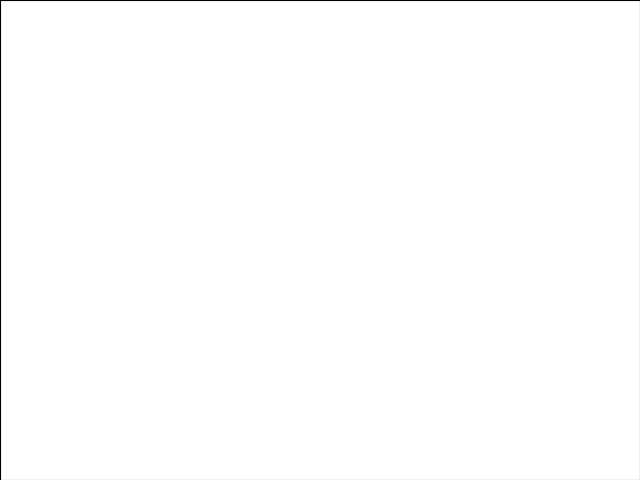

In [2]:
x_data=[]
y_data=[]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
line, = ax.plot([], [], 'ro')
ax.set_xlim(( -20, 20))
ax.set_ylim((-20, 20))
ax.set_title("my_robot")
ax.set_xlabel("x")
ax.set_ylabel("y")


In [3]:
def odom_callback(msg):
    global x_data, y_data
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)

In [4]:
rospy.init_node('odom_visualizer_node')
jr.subscribe('/odom', Odometry, odom_callback)

In [5]:
from IPython.display import display

button = widgets.Button(description="Click Me!")
output = widgets.Output()

In [6]:
display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.


Button(description='Click Me!', style=ButtonStyle())

Output()

In [7]:
def on_button_clicked(b):
    np_x_plot = np.array(x_data)
    np_y_plot = np.array(y_data)
    fig = plt.cla()
    ax.set_xlim(( -20, 20))
    ax.set_ylim((-20, 20))
    ax.plot(np_x_plot,np_y_plot)

In [8]:
button.on_click(on_button_clicked)